In [1]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [2]:
df = pd.read_csv(Path('./Monthly_Consumption.csv'))
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                       test='adf',       # use adftest to find optimal 'd'
                       max_p=3, max_q=3, # maximum p and q
                       m=1,              # frequency of series
                       d=None,           # let model determine 'd'
                       seasonal=False,   # No Seasonality
                       start_P=0, 
                       D=0, 
                       trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3398.525, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3900.821, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3817.816, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3398.929, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3394.590, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3798.468, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3388.157, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3365.975, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3372.859, Time=0.21 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=3374.066, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3397.656, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3348.819, Time=0.40 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3358.114, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : 

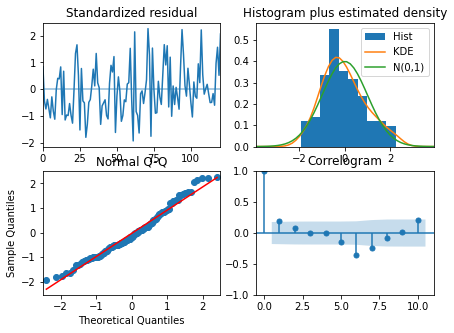

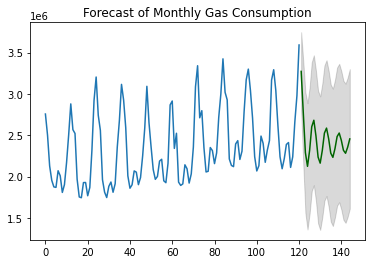

In [3]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast of Monthly Gas Consumption")
plt.show()

In [6]:
df2 = pd.read_csv(Path('./Daily_HH.csv'))
model2 = pm.auto_arima(df2.value, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

print(model2.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36601.566, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=33531.530, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=31624.902, Time=0.59 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=30377.320, Time=0.92 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26650.953, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26447.100, Time=0.67 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=26416.999, Time=1.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26714.697, Time=0.61 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26383.418, Time=1.29 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=26378.663, Time=0.93 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=26386.603, Time=1.42 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=26371.275, Time=0.82 sec

Best model: 

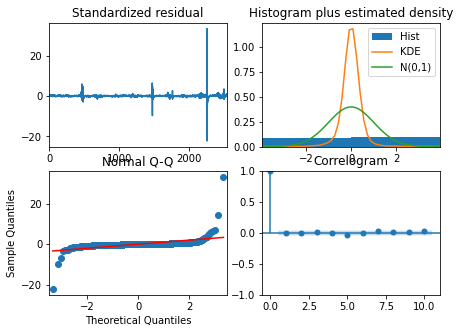

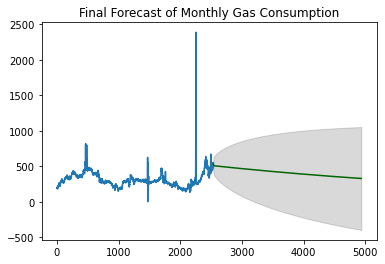

In [7]:
model2.plot_diagnostics(figsize=(7,5))
plt.show()

# Forecast
n_periods = 2400
fc, confint = model2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df2.value), len(df2.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df2.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast of Daily Gas Price")
plt.show()